# <font color='red'>**SPAM EMAIL DETECTION**</font>





*   The primary goal of this notebook is to develop a predictive model that accurately classifies incoming SMS messages as either spam or not.

*   We will use the SMS Spam Collection dataset, which consists of 5,574 SMS messages tagged with their respective labels.


*   Algorithms used: ***Logistic Regression,random forest classifier, adaboosting classifier, knn***



*   Dataset:-https://www.kaggle.com/datasets/mfaisalqureshi/spam-email



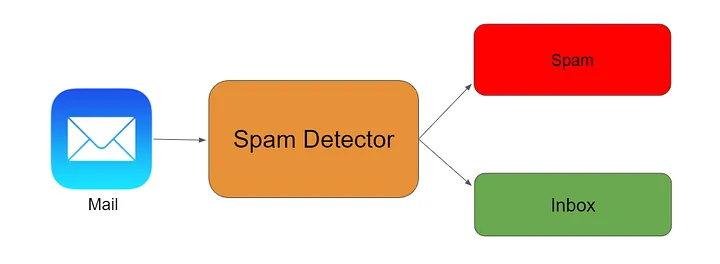

**1.Import Necessary Libraries**

In [5]:
import pandas as pd   #for data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns
import pickle

import nltk  # for natural language processing
from sklearn.preprocessing import LabelEncoder

from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Import the Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from wordcloud import WordCloud

from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**2.Load the Data**

In [6]:
df=pd.read_csv('/content/drive/MyDrive/CognoRiseInfoTech/spam.csv')
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


**3.Data Cleaning**

In [7]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
# Rename the column
df.rename(columns={'Category':'Target'},inplace=True)
df

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# convert the target column
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])


In [10]:
df

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
mapp=list(zip(encoder.classes_,encoder.transform(encoder.classes_)))
mapp

[('ham', 0), ('spam', 1)]

In [12]:
# check missing values
df.isna().sum()

Target     0
Message    0
dtype: int64

In [13]:
#check datatypes
df.dtypes

Target      int64
Message    object
dtype: object

In [14]:
#check duplicate values
df.duplicated().sum()

415

In [15]:
#Remove Duplicate values
df=df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
df


,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [18]:
#Shape of the Dataset
df.shape

(5157, 2)

In [19]:
w=df['Target']
z=df['Message']

**4.EDA**

In [20]:
#counts values inside the target
a=df['Target'].value_counts()
a

Target
0    4516
1     641
Name: count, dtype: int64

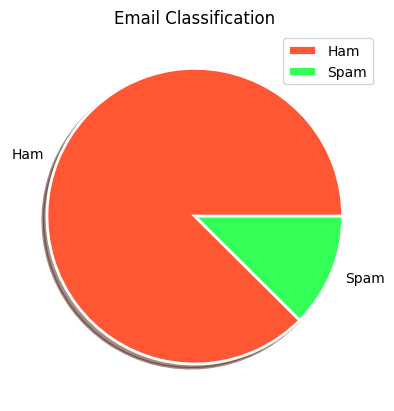

In [22]:
#pie chart
plt.pie(a,labels=['Ham','Spam'],colors=['#FF5733', '#33FF57'],shadow=True,wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.legend(loc='upper right')
plt.title('Email Classification')
plt.show()

The percentage of ham is too high as compare to spam messages percentage. so the data is imbalance

**Word Cloud for Spam Messages**

In [23]:
wc=WordCloud(width=1000,height=1000,background_color='White',min_font_size=10)

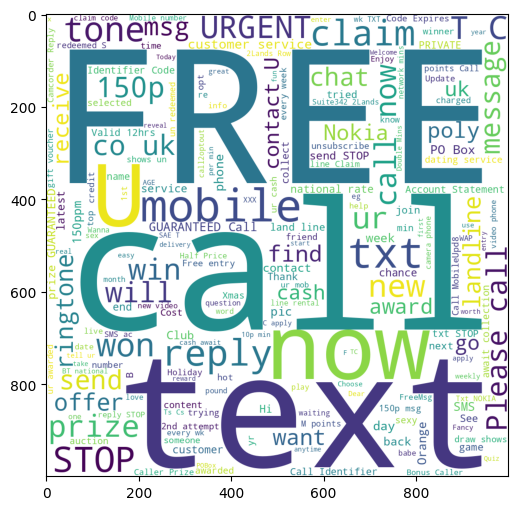

In [24]:
spam_wc=wc.generate(df[df['Target']==1].to_string())
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

**Word Cloud for ham Messages**

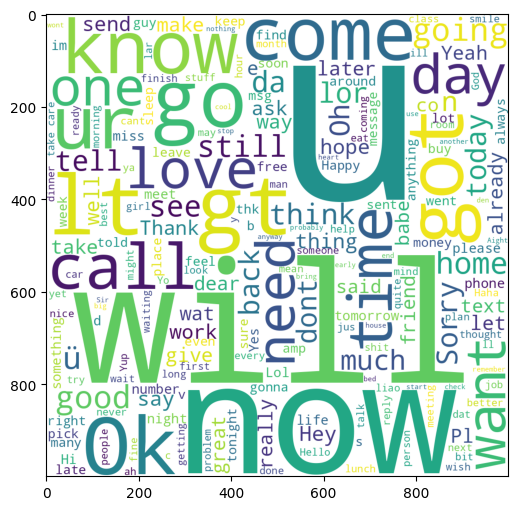

In [25]:
ham_wc=wc.generate(df[df['Target']==0].to_string())
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

**5.Data Preprocessing**

In [26]:
#save text into tweets
tweets=df.Message
tweets

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object

In [27]:
#remove special
tweets=tweets.str.replace("[^a-zA-Z0-9 ]"," ",regex=True)
tweets

0       Go until jurong point  crazy   Available only ...
1                           Ok lar    Joking wif u oni   
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor    U c already then say   
4       Nah I don t think he goes to usf  he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will   b going to esplanade fr home 
5569    Pity    was in mood for that  So   any other s...
5570    The guy did some bitching but I acted like i d...
5571                           Rofl  Its true to its name
Name: Message, Length: 5157, dtype: object

In [28]:
#identify the words and tokenization
s=SnowballStemmer('english')
t=TweetTokenizer()
tweets=tweets.apply(lambda line:[s.stem(i.lower()) for i in t.tokenize(line)]).apply(lambda i:" ".join(i))
tweets

0       go until jurong point crazi avail onli in bugi...
1                                   ok lar joke wif u oni
2       free entri in 2 a wkli comp to win fa cup fina...
3             u dun say so earli hor u c alreadi then say
4       nah i don t think he goe to usf he live around...
                              ...                        
5567    this is the 2nd time we have tri 2 contact u u...
5568                        will b go to esplanad fr home
5569       piti was in mood for that so ani other suggest
5570    the guy did some bitch but i act like i d be i...
5571                              rofl it true to it name
Name: Message, Length: 5157, dtype: object

In [29]:
# stopwords
sw=stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
#remove stopwords
tweets=tweets.apply(lambda line:[i for i in t.tokenize(line) if i not in sw]).apply(lambda i:' '.join(i))
tweets

0       go jurong point crazi avail onli bugi n great ...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkts 2...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
5568                                b go esplanad fr home
5569                                piti mood ani suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5157, dtype: object

In [31]:
tweets=tweets.apply(lambda line:[i for i in t.tokenize(line) if len(i)>2]).apply(lambda i:" ".join(i))
tweets

0       jurong point crazi avail onli bugi great world...
1                                        lar joke wif oni
2       free entri wkli comp win cup final tkts 21st m...
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri contact 750 pound prize claim eas...
5568                                        esplanad home
5569                                piti mood ani suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5157, dtype: object

**6.Model Building**

In [32]:
#Vectorization
v=TfidfVectorizer()
vect=v.fit_transform(tweets)
print(vect)

  (0, 6586)	0.20142882950369156
  (0, 1012)	0.36443780217133853
  (0, 2967)	0.1704300889090806
  (0, 1773)	0.307384260399747
  (0, 1545)	0.347750710936484
  (0, 6754)	0.2543820622415799
  (0, 3005)	0.20302729957949928
  (0, 1547)	0.307384260399747
  (0, 4488)	0.17680499697633453
  (0, 1197)	0.27636245708058205
  (0, 1972)	0.2815136001603399
  (0, 4777)	0.24906429775654015
  (0, 3557)	0.36443780217133853
  (1, 4486)	0.5869126419978632
  (1, 6680)	0.4622388118638353
  (1, 3526)	0.5009220368833591
  (1, 3689)	0.43697361983811384
  (2, 71)	0.2725910084537709
  (2, 1084)	0.18922827024691544
  (2, 5033)	0.18277237895149367
  (2, 6328)	0.14202894886551778
  (2, 5780)	0.22991628482544196
  (2, 4991)	0.19027187208856364
  (2, 5070)	0.18195144213908113
  (2, 780)	0.26010945192816515
  :	:
  (5152, 4897)	0.22015310592366555
  (5152, 4664)	0.23559988824944203
  (5152, 5033)	0.24729983682728854
  (5152, 4488)	0.17893525139919578
  (5153, 2488)	0.8703338960380764
  (5153, 3205)	0.4924620893096063
  

In [33]:
vect.shape

(5157, 6892)

Dependent and Independent Variable

In [34]:
# convert the vector into array
X=vect.toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
df1=pd.DataFrame(X)
df1

,0,1,2,3,4,5,6,7,8,9,...,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
y=df['Target']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5157, dtype: int64

The dataset is imbalanced, so oversampling was performed.

In [37]:
us=SMOTE(random_state=1)
X1,y1=us.fit_resample(X,y)

In [38]:
y.value_counts()

Target
0    4516
1     641
Name: count, dtype: int64

In [39]:
y1.value_counts()


Target
0    4516
1    4516
Name: count, dtype: int64

In [40]:
#Split into Train and Test Data
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=2)

In [41]:
X_train.shape,X_test.shape

((6322, 6892), (2710, 6892))

In [42]:
y_train.shape,y_test.shape

((6322,), (2710,))

KNeighborsClassifier(n_neighbors=3)
------******------
accuracy = 99.70479704797049
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1354
           1       1.00      1.00      1.00      1356

    accuracy                           1.00      2710
   macro avg       1.00      1.00      1.00      2710
weighted avg       1.00      1.00      1.00      2710


RandomForestClassifier(n_estimators=50, random_state=1)
------******------
accuracy = 99.52029520295203
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1354
           1       1.00      0.99      1.00      1356

    accuracy                           1.00      2710
   macro avg       1.00      1.00      1.00      2710
weighted avg       1.00      1.00      1.00      2710


AdaBoostClassifier(random_state=1)
------******------
accuracy = 98.30258302583026
              precision    recall  f1-score   support

           0      

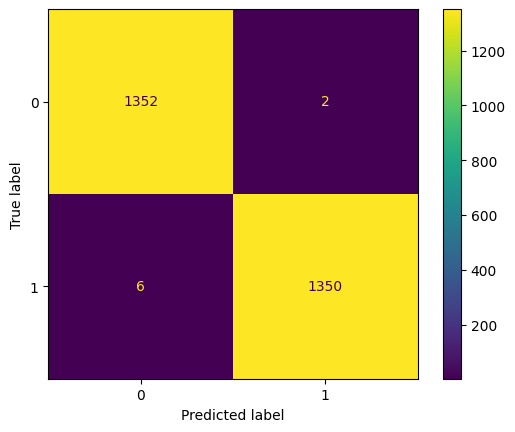

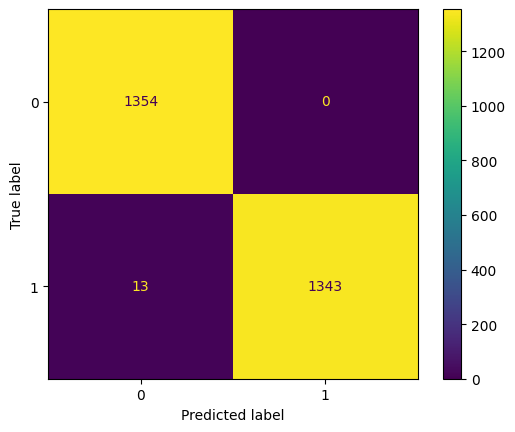

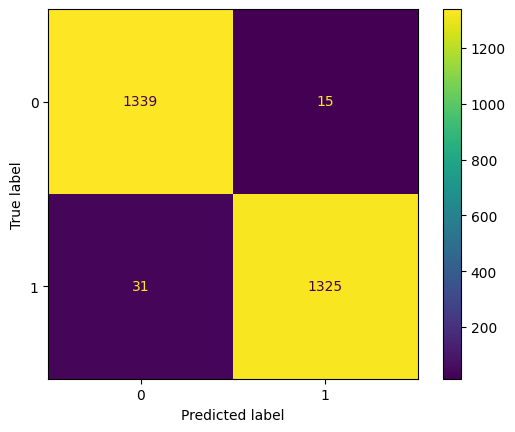

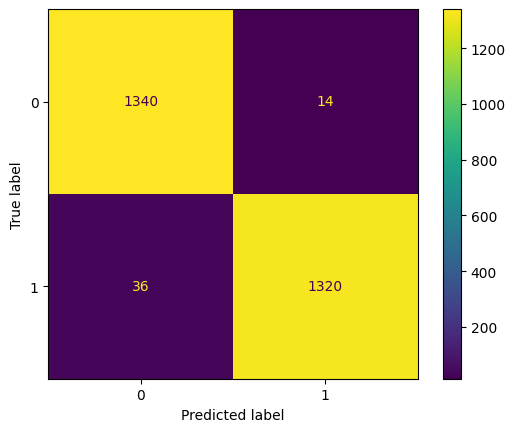

In [43]:
#Initialize the Models
k=KNeighborsClassifier(n_neighbors=3)
r=RandomForestClassifier(n_estimators=50,random_state=1)
a=AdaBoostClassifier(random_state=1)
l=LogisticRegression()

li=[k,r,a,l]
for i in li:
  print(i)
  print('------******------')
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print('accuracy =',accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print()

KNeighborsClassifier and RandomForestClassifierdemonstrated the highest accuracy, both achieving approximately 99%.

accuracy = 99.52029520295203
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1354
           1       1.00      0.99      1.00      1356

    accuracy                           1.00      2710
   macro avg       1.00      1.00      1.00      2710
weighted avg       1.00      1.00      1.00      2710



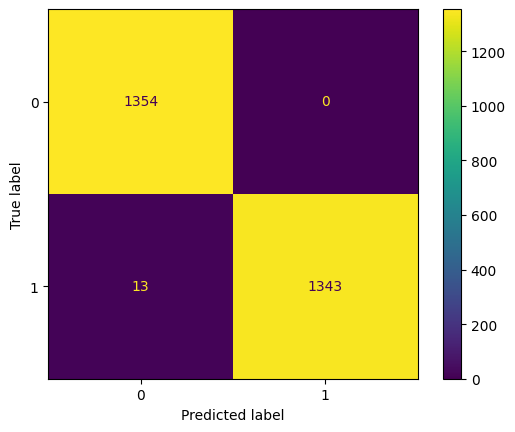

In [44]:
rn=RandomForestClassifier(n_estimators=50,random_state=1)
rn.fit(X_train,y_train)
y_rn=rn.predict(X_test)
print('accuracy =',accuracy_score(y_test,y_rn)*100)
print(classification_report(y_test,y_rn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_rn))


In [50]:
#predict new value
y_new=rn.predict(v.transform(["WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim..."]).toarray())
if y_new==0:
  print('not spam message')
else:
  print('spam message')

spam message


In [48]:
#model file and vectorizer file saved using pickle
pickle.dump(rn,open('model2.pkl','wb'))
pickle.dump(v,open('vector.pkl','wb'))